In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
azure_usage = pd.read_csv('C:\\Users\\vince\\Project_Azure\\data\\raw\\azure_usage.csv')
external_factors = pd.read_csv('C:\\Users\\vince\\Project_Azure\\data\\raw\\external_factors.csv')


In [9]:
print(azure_usage.info())
print(azure_usage.head())
print(azure_usage.describe())

print(external_factors.info())
print(external_factors.head())
print(external_factors.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1080 non-null   object
 1   region         1080 non-null   object
 2   resource_type  1080 non-null   object
 3   usage_cpu      1080 non-null   int64 
 4   usage_storage  1080 non-null   int64 
 5   users_active   1080 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 50.8+ KB
None
         date   region resource_type  usage_cpu  usage_storage  users_active
0  2023-01-01  East US            VM         88           1959           470
1  2023-01-01  East US       Storage         92           1595           388
2  2023-01-01  East US     Container         70            621           414
3  2023-01-01  West US            VM         60           1982           287
4  2023-01-01  West US       Storage         85           1371           351
         usage_cpu  usage_storag

In [10]:
print("\nMissing values in Azure Usage:")
print(azure_usage.isnull().sum())

print("\nMissing values in External Factors:")
print(external_factors.isnull().sum())


Missing values in Azure Usage:
date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64

Missing values in External Factors:
date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64


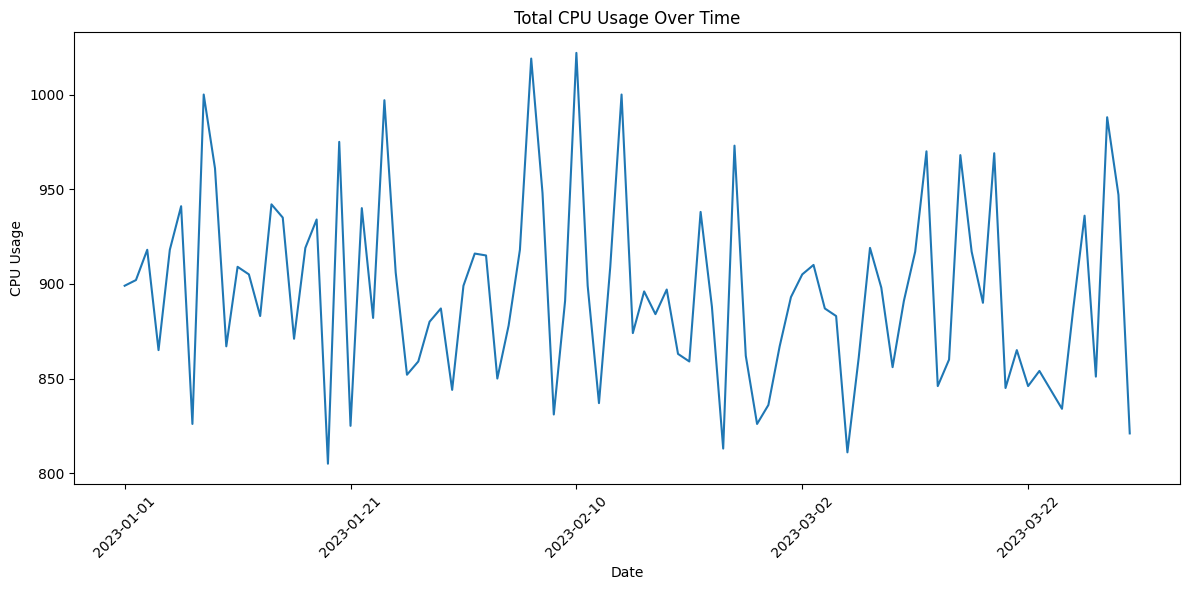

In [12]:
plt.figure(figsize=(12,6))
azure_usage.groupby('date')['usage_cpu'].sum().plot()
plt.title('Total CPU Usage Over Time')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


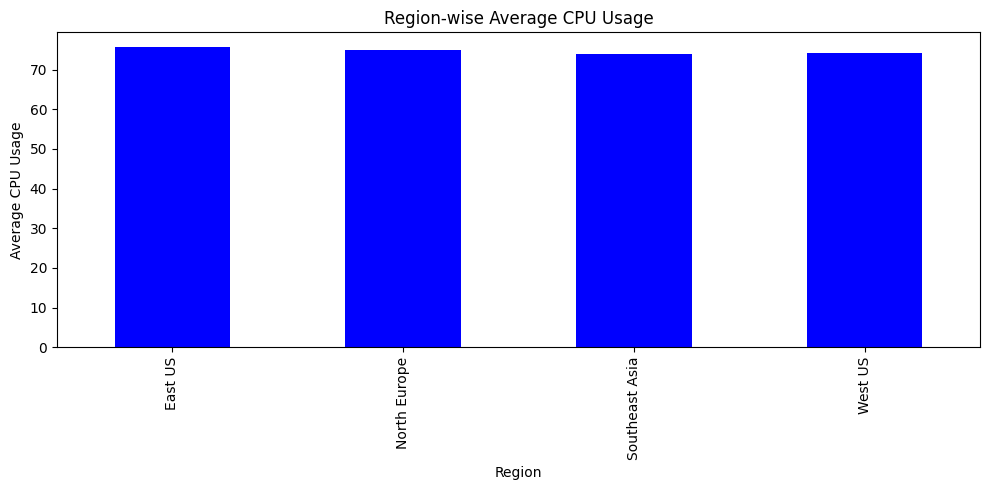

In [19]:
plt.figure(figsize=(10,5))
azure_usage.groupby('region')['usage_cpu'].mean().plot(kind='bar', color='blue')
plt.title('Region-wise Average CPU Usage')
plt.xlabel('Region')
plt.ylabel('Average CPU Usage')
plt.tight_layout()
plt.show()

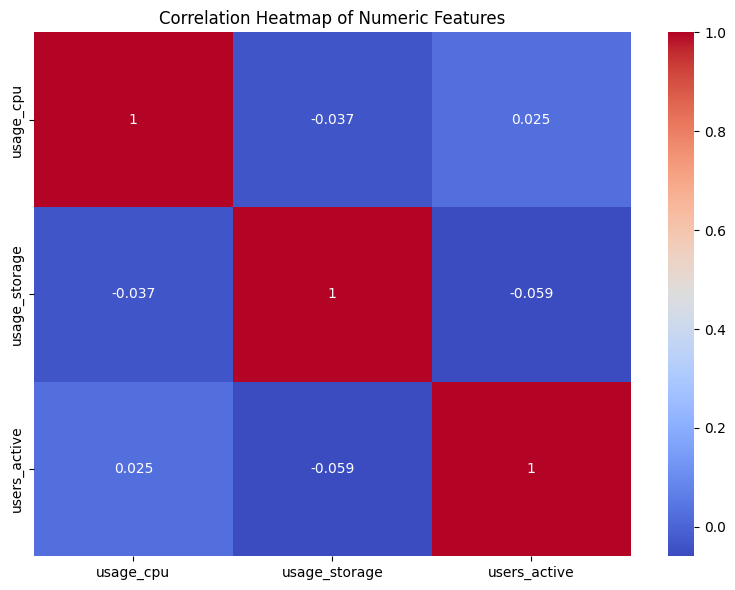

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(azure_usage.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [21]:
average_cpu = azure_usage['usage_cpu'].mean()
print("Average CPU Usage:", average_cpu)


Average CPU Usage: 74.65185185185184


In [22]:
average_storage = azure_usage['usage_storage'].mean()
print("Average Storage Usage:", average_storage)


Average Storage Usage: 1242.4777777777779


In [23]:
min_users = azure_usage['users_active'].min()
max_users = azure_usage['users_active'].max()
print("Active Users range: {} to {}".format(min_users, max_users))


Active Users range: 200 to 499


In [24]:
print(external_factors[['economic_index', 'cloud_market_demand']].describe())


       economic_index  cloud_market_demand
count       90.000000            90.000000
mean        98.930444             1.006667
std          8.825072             0.101517
min         73.800000             0.800000
25%         93.035000             0.940000
50%         99.645000             1.015000
75%        103.567500             1.077500
max        118.860000             1.270000


In [25]:
print(external_factors['holiday'].value_counts())


holiday
0    65
1    25
Name: count, dtype: int64
